# Natural Language Processing

The dataset contains over __450,000__ vehicles and only 26 atributes that have to be processed.

This document will apply NLP for feature extraction of the description of each car model.

Techniques include _1. TF-IDF_ and _2. Word Embedding_

I followed the following method: https://medium.com/@eiki1212/feature-extraction-in-natural-language-processing-with-python-59c7cdcaf064

## Prepare data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
import CleaningCars as hf

In [3]:
def load_data():    
    csv_path = os.path.join('data', 'vehicles.csv')
    return pd.read_csv(csv_path)

df = load_data()

In [4]:
df.shape

(458213, 26)

# HELPER FUNCTIONS

### Removing unecesarry columns

In [5]:
df = hf.remove_columns(df)

In [6]:
df.columns

Index(['url', 'region', 'price', 'year', 'manufacturer', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

### Price Range

In [7]:
df = hf.price_range(df, 1)

In [8]:
df.shape

(420375, 19)

In [9]:
sum(df["price"] > 60000)

0

### Check for empty values

In [10]:
df["description"].isnull().sum()

65

Only 4 empty values so lets get rid of them

In [11]:
df = df.dropna(subset = ["description"])

In [12]:
df.shape

(420310, 19)

Max and min car price

(array([3006., 1677., 2211., 1538., 2515.,  854.,  819., 1044.,  614.,
        2112.,  272., 1030.,  687.,  461., 2625.,  553.,  629., 1218.,
         867., 3336.,  324., 1111.,  992.,  813., 4280.,  663., 1004.,
        1792., 1589., 5496.,  287., 1321., 1199.,  795., 5195.,  834.,
        1014., 1924., 2253., 6850.,  249., 1319., 1210.,  828., 5286.,
         710.,  810., 1596., 2116., 5995., 2474.,  261., 1261.,  589.,
        2336., 3408.,  677.,  958., 1278., 8786., 1897.,  258., 1012.,
         611., 2413., 3379.,  393.,  940., 1329., 9250., 1365.,  207.,
         951.,  448., 2223., 2718.,  445.,  637., 1084., 8899., 1390.,
         202.,  619.,  374., 1856., 2580.,  377.,  809.,  784., 8327.,
        1107.,  115.,  525.,  389., 1363., 2303.,  385.,  635., 1097.,
        8419.]),
 array([1.00000e+00, 1.00980e+02, 2.00960e+02, 3.00940e+02, 4.00920e+02,
        5.00900e+02, 6.00880e+02, 7.00860e+02, 8.00840e+02, 9.00820e+02,
        1.00080e+03, 1.10078e+03, 1.20076e+03, 1.30074e+

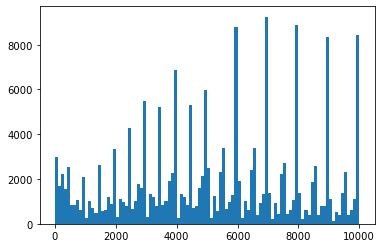

In [13]:
#plot_price = df["price"].loc[df["price"] < 100_000]

plt.hist(df["price"].loc[df["price"] < 10000].values, bins = 100)

(array([11801.,  5891.,  6173.,  7443., 14824.,  9631., 13609., 10440.,
        13133., 18880.,  7859., 13754.,  7562., 12189., 15619.,  4846.,
        11933.,  4748.,  9396., 11823.,  4176.,  9537.,  4233.,  9112.,
        12847.,  3043.,  8756.,  3689.,  7505.,  9976.,  2550.,  6779.,
         2652.,  7026.,  5914.,  1327.,  5170.,  1920.,  4745.,  6068.,
         1260.,  5575.,  1286.,  4369.,  5524.,  1646.,  5020.,  1855.,
         4236.,  5930.,  1095.,  3183.,  1037.,  3790.,  3639.,   959.,
         2975.,   758.,  3868.,  3190.,   668.,  2692.,   849.,  2072.,
         2568.,   979.,  3431.,   445.,  1120.,  1619.,   559.,  1274.,
          287.,  1146.,  1001.,   348.,   730.,   236.,   889.,   629.,
          242.,   629.,   175.,  1159.,   198.,   133.,   444.,   162.,
          508.,   454.,    86.,   617.,    88.,   404.,   323.,   139.,
          289.,    83.,   247.,   614.]),
 array([1.000000e+00, 6.009800e+02, 1.200960e+03, 1.800940e+03,
        2.400920e+03, 3.000900

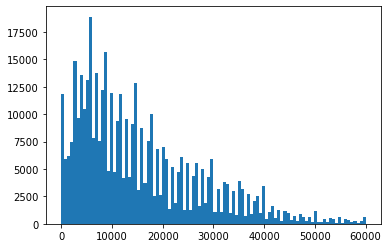

In [14]:
#plot_price = df["price"].loc[df["price"] < 100_000]

plt.hist(df["price"].values, bins = 100)

## 1. TF-IDF

Serves as a way to extract features based off of the importance of words

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [159]:
vectorizer = TfidfVectorizer(stop_words='english',max_features = 100)

In [160]:
sentences  = df["description"].values

In [161]:
vectorizer.fit(sentences)

TfidfVectorizer(max_features=100, stop_words='english')

In [162]:
len(vectorizer.vocabulary_)

100

In [163]:
vectorizer.vocabulary_

{'car': 21,
 '2016': 7,
 'miles': 63,
 'vehicle': 95,
 '2014': 5,
 'time': 86,
 'transmission': 91,
 'used': 93,
 'new': 65,
 'check': 26,
 'engine': 41,
 'power': 69,
 'rear': 72,
 'like': 57,
 'body': 18,
 'passenger': 67,
 'driver': 40,
 'seat': 76,
 'fuel': 47,
 'leather': 56,
 'great': 50,
 'test': 84,
 'drive': 39,
 'text': 85,
 'carvana': 24,
 'buy': 19,
 'safety': 73,
 'trade': 90,
 'cars': 23,
 'make': 60,
 'contact': 32,
 'stock': 82,
 'number': 66,
 'http': 52,
 'www': 99,
 'carvanaauto': 25,
 'com': 31,
 'pre': 70,
 'auto': 12,
 'credit': 34,
 'finance': 44,
 'chevrolet': 27,
 'low': 59,
 '150': 0,
 'financing': 45,
 'model': 64,
 'fees': 43,
 'dealership': 36,
 'good': 49,
 'clean': 29,
 'color': 30,
 'price': 71,
 'title': 87,
 'sales': 75,
 'information': 54,
 '2017': 8,
 '2015': 6,
 '2013': 4,
 '2012': 3,
 '2011': 2,
 'toyota': 89,
 '4dr': 9,
 'suv': 83,
 'today': 88,
 'mileage': 62,
 'automatic': 13,
 'exterior': 42,
 'interior': 55,
 'black': 16,
 'series': 79,
 '4wd'

In [164]:
# Transform to document-term matrix
vector_spaces = vectorizer.transform(sentences)


In [165]:
tfidf = vector_spaces.toarray()

In [166]:
from sklearn.linear_model import lasso_path

In [167]:
alphas_lasso, coefs_lasso, _ = lasso_path(tfidf, df["price"], fit_intercept=False)

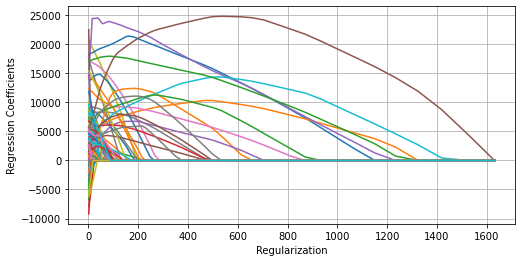

In [169]:
fig, ax = plt.subplots(figsize = (8,4))
for i in range(100):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
    ax.grid(True)
    ax.set_xlabel("Regularization")
    ax.set_ylabel("Regression Coefficients")

In [170]:
clf = linear_model.Lasso(alpha=50)

In [171]:
clf.fit(tfidf, df["price"])

Lasso(alpha=50)

In [172]:
mean_squared_error(df["price"], clf.predict(tfidf))

158939286.88777274

In [173]:
sum(clf.coef_ != 0)

31

In [180]:
np.where(clf.coef_ == 0)[0]

array([ 2,  3,  4,  5,  9, 11, 12, 13, 14, 15, 18, 19, 21, 23, 25, 26, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 52,
       53, 54, 55, 56, 57, 59, 60, 62, 64, 66, 67, 69, 71, 73, 74, 75, 76,
       77, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 93, 94, 96, 98,
       99], dtype=int64)

In [186]:
#most important words by tfidf
iwords = np.asarray(list(vectorizer.vocabulary_))

In [187]:
iwords[np.where(clf.coef_ == 0)[0]]

array(['miles', 'vehicle', '2014', 'time', 'check', 'power', 'rear',
       'like', 'body', 'passenger', 'fuel', 'leather', 'test', 'text',
       'buy', 'safety', 'stock', 'number', 'http', 'www', 'carvanaauto',
       'com', 'pre', 'auto', 'credit', 'finance', 'chevrolet', 'low',
       '150', 'financing', 'model', 'dealership', 'good', 'title',
       'sales', 'information', '2017', '2015', '2013', '2011', 'toyota',
       'suv', 'mileage', 'exterior', 'interior', 'series', 'heated',
       'control', 'sport', 'available', 'bad', 'wheel', 'dealer',
       'details', 'gasoline', 'carfax', 'sale', 'air', 'windows',
       'steering', 'sedan', 'truck', 'vehicles', 'bmw', 'mercedes',
       'class', 'pickup', 'v6', 'il'], dtype='<U12')